In [316]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [317]:
df=pd.read_csv('E:\Imarticus\Machine Learning/Unsupervised Learning/K-Means/K-means/Dataset/cust_data.csv')

In [318]:
df.head(5)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [320]:
df.shape

(30000, 38)

In [321]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

<AxesSubplot:>

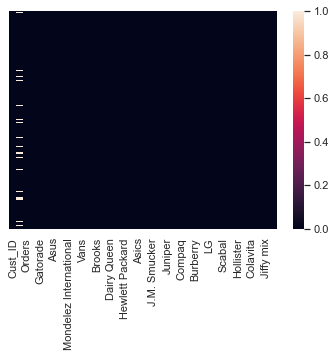

In [322]:
sns.heatmap(df.isnull(),yticklabels=False)

In [323]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [324]:
a=df.columns

C:\Users\ajaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'NO.of.Customers')

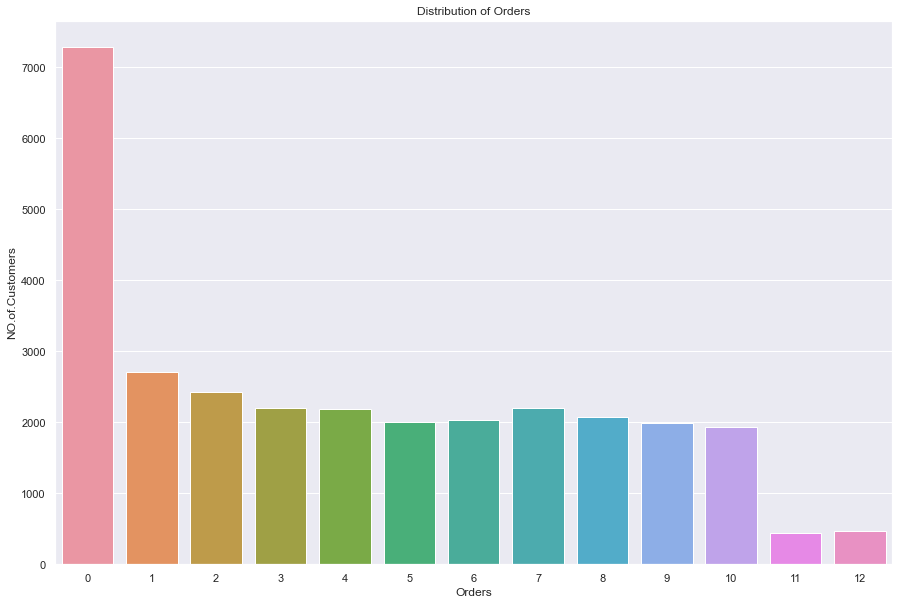

In [325]:
plt.figure(figsize=(15,10))
sns.countplot(df['Orders'])
plt.title('Distribution of Orders')
plt.xlabel('Orders')
plt.ylabel('NO.of.Customers')

### i) most of the customers do not have past purchase order
### ii)minimum no of purchase is 0
### iii)maximum no of purchase is 12

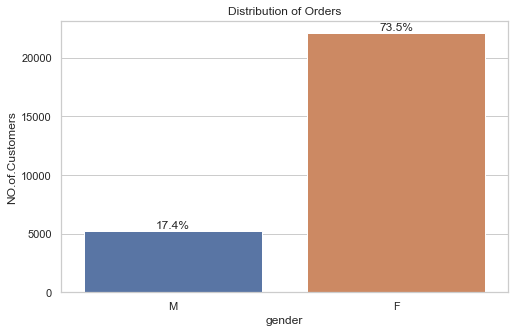

In [326]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="Gender", data=df)
plt.title('Purchase based of Gender', fontsize=20)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='center')
plt.title('Distribution of Orders')
plt.xlabel('gender')
plt.ylabel('NO.of.Customers')
plt.show()



### the plot shows that females purshase more than male
### the percentage of male purchase=>17.4%
### the percentage of Female purchase=>73.5%

In [327]:
# labels=df['Gender'].value_counts().index
# sizes=df['Gender'].value_counts().values
# plt.pie(sizes,  labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

In [328]:
df.describe(include='O')

,Gender
count,27276
unique,2
top,F
freq,22054


In [329]:
df.isnull().sum().values

array([   0, 2724,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int64)

In [330]:
df1=pd.DataFrame({'Columns':df.columns,
                 'Missing':[df[i].isnull().sum() for i in df.columns],
                  'Percentage':[(df[i].isnull().sum()/len(df))*100 for i in df.columns]})

In [331]:
df1

,Columns,Missing,Percentage
0,Cust_ID,0,0.00
1,Gender,2724,9.08
2,Orders,0,0.00
3,Jordan,0,0.00
4,Gatorade,0,0.00
5,Samsung,0,0.00
6,Asus,0,0.00
7,Udis,0,0.00
8,Mondelez International,0,0.00
9,Wrangler,0,0.00


In [332]:
# df.drop(['Gender','Orders'],axis=1,inplace=True)
feature=df.drop(['Gender','Orders'],axis=1)
feature.head(10)
# for grouping the cluster we dont need gender and orders

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [333]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(feature)

In [334]:
feature_scaled=pd.DataFrame(feature )

In [335]:
feature_scaled

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build a Model with K means

In [336]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[3,4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k , random_state=0)
    predict=cluster.fit_predict(feature_scaled)
    
    score=silhouette_score(feature_scaled , predict , random_state=0)
    print('for n_clusters={} , silhoutte score is {}'.format(k, score))

for n_clusters=3 , silhoutte score is 0.5901557614146677
for n_clusters=4 , silhoutte score is 0.5718721588537325
for n_clusters=5 , silhoutte score is 0.5609206422280488
for n_clusters=6 , silhoutte score is 0.5535105273164889
for n_clusters=7 , silhoutte score is 0.5483067537313743
for n_clusters=8 , silhoutte score is 0.5443980626446502


### elbow method

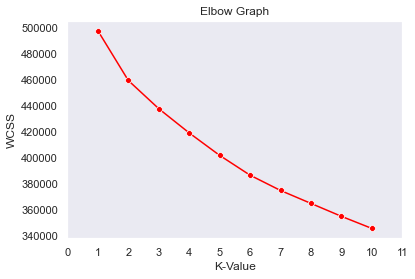

In [337]:
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="random", random_state = 42)
    kmeans.fit(feature_scaled.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

In [338]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4, random_state=0)

# fit the model
model.fit(feature_scaled)

KMeans(n_clusters=4, random_state=0)

# Retrive the Cluster

In [339]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [340]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)                

(array([0, 1, 2, 3]), array([7500, 7495, 7513, 7492], dtype=int64))

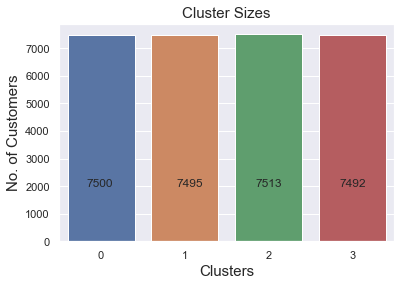

In [341]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

# cluter centers

In [342]:
# form a dataframe containing cluster centers
# 'cluster_centers_' returns the co-ordinates of a cluster center 
centers = pd.DataFrame(model.cluster_centers_, columns=  data_output.columns[0:36])      

In [343]:
# head() to display top five rows
centers.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft
0,18733.5,0.288954,0.281083,0.232524,0.193303,0.158751,0.143677,0.115662,0.109658,0.093783,...,0.116729,0.288954,0.409285,0.156483,0.073506,0.062567,0.191836,0.112193,0.087647,0.104589
1,3749.5,0.196186,0.224593,0.150573,0.112697,0.093091,0.108429,0.073486,0.115898,0.082422,...,0.077487,0.217125,0.311016,0.160843,0.044145,0.044812,0.193652,0.120565,0.098426,0.058015
2,26241.0,0.351244,0.263865,0.300838,0.197101,0.197234,0.161458,0.134060,0.127411,0.082857,...,0.120894,0.339008,0.416811,0.171964,0.132464,0.079532,0.189520,0.115973,0.074212,0.060779
3,11242.0,0.233071,0.239749,0.207560,0.142113,0.124883,0.145452,0.104448,0.092694,0.118071,...,0.094965,0.239215,0.342995,0.146521,0.060371,0.042340,0.193803,0.116736,0.091893,0.060238
